In [2]:
import numpy as np
import matplotlib.pyplot as plt

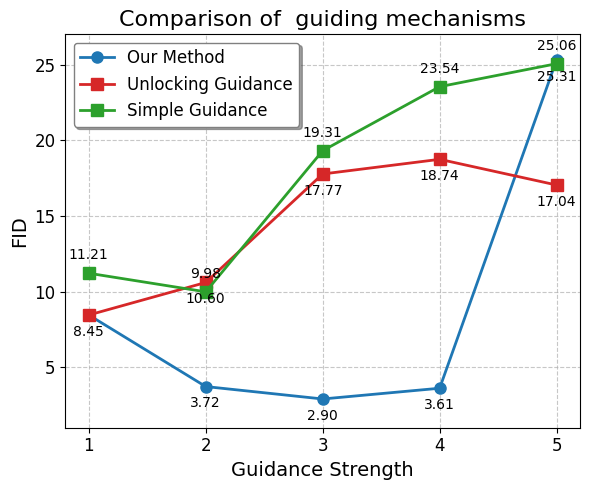

In [3]:
strengths = [1, 2., 3., 4., 5.]
tau_ours = [8.45, 3.72, 2.90, 3.61, 25.31]
# tau_theirs = [8.45, 52.98, 58.80, 48.96, 18.74]
tau_theirs = [8.45, 10.60, 17.77, 18.74, 17.04]
tau_simple = [11.21, 9.982, 19.31, 23.54, 25.06]


# Create a professional plot comparing tau values
plt.figure(figsize=(6, 5))

# Plot data with distinct markers and colors
plt.plot(strengths, tau_ours, 'o-', color='#1f77b4', linewidth=2, markersize=8, label='Our Method')
plt.plot(strengths, tau_theirs, 's-', color='#d62728', linewidth=2, markersize=8, label='Unlocking Guidance')
plt.plot(strengths, tau_simple, 's-', color='#2ca02c', linewidth=2, markersize=8, label='Simple Guidance')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set labels and title with professional fonts
plt.xlabel('Guidance Strength', fontsize=14)
plt.ylabel('FID', fontsize=14)
plt.title('Comparison of  guiding mechanisms', fontsize=16)

# Customize ticks
plt.xticks(strengths, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(1, 27)

# Add legend with shadow
plt.legend(fontsize=12, frameon=True, facecolor='white', edgecolor='gray', shadow=True, loc='upper left')

# Tight layout for better spacing
plt.tight_layout()

# Optional: Add annotations for significant points
for i, (x, y1, y2, y3) in enumerate(zip(strengths, tau_ours, tau_theirs, tau_simple)):
    if i > 0:
        plt.annotate(f'{y1:.2f}', (x, y1), textcoords="offset points", 
                    xytext=(0,-15), ha='center', fontsize=10)
    plt.annotate(f'{y2:.2f}', (x, y2), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=10)
    plt.annotate(f'{y3:.2f}', (x, y3), textcoords="offset points", 
                xytext=(0,+10), ha='center', fontsize=10)
# Save the figure in high resolution
# plt.savefig('guidance_comparison.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('guidance_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
# plt.show()
plt.savefig('Comparison Guidance Imagenet.pdf')

[1.         0.88888889 0.77777778 0.66666667 0.55555556 0.44444444
 0.33333333 0.22222222 0.11111111 0.        ]


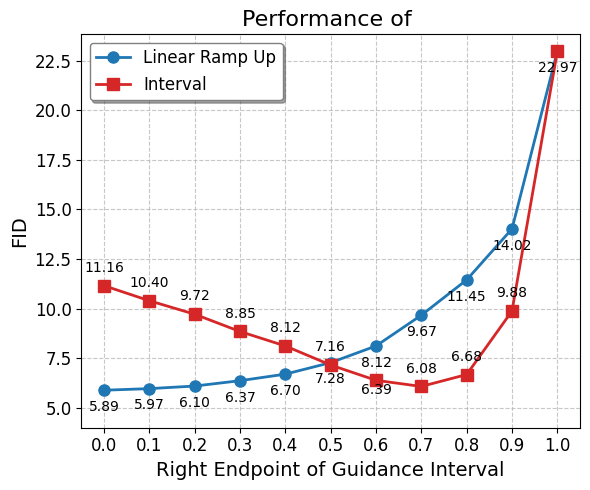

In [22]:
final_times = np.linspace(1.0, 0.0, 10)
print(final_times)
right = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
fids_linear_ramp = [5.89, 5.97, 6.10, 6.37, 6.70, 7.28, 8.12, 9.67, 11.45, 14.02, 22.97]
fids_interval    = [11.16, 10.40, 9.72, 8.85, 8.12, 7.16, 6.39, 6.08, 6.68, 9.88, 22.97]


# Create a professional plot comparing tau values
plt.figure(figsize=(6, 5))

# Plot data with distinct markers and colors
plt.plot(right, fids_linear_ramp, 'o-', color='#1f77b4', linewidth=2, markersize=8, label='Linear Ramp Up')
plt.plot(right, fids_interval, 's-', color='#d62728', linewidth=2, markersize=8, label='Interval')
# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set labels and title with professional fonts
plt.xlabel('Right Endpoint of Guidance Interval', fontsize=14)
plt.ylabel('FID', fontsize=14)
plt.title('Performance of ', fontsize=16)

# Customize ticks
plt.xticks(right, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(4)

# Add legend with shadow
plt.legend(fontsize=12, frameon=True, facecolor='white', edgecolor='gray', shadow=True, loc='upper left')

# Tight layout for better spacing
plt.tight_layout()

# Optional: Add annotations for significant points
for i, (x, y1, y2) in enumerate(zip(right, fids_interval, fids_linear_ramp)):
    offset = 10 if x != .6 else -10
    if x != 1.0:
        plt.annotate(f'{y1:.2f}', (x, y1), textcoords="offset points", 
                    xytext=(0,offset), ha='center', fontsize=10)
    plt.annotate(f'{y2:.2f}', (x, y2), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=10)
# Save the figure in high resolution
# plt.savefig('guidance_comparison.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('guidance_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

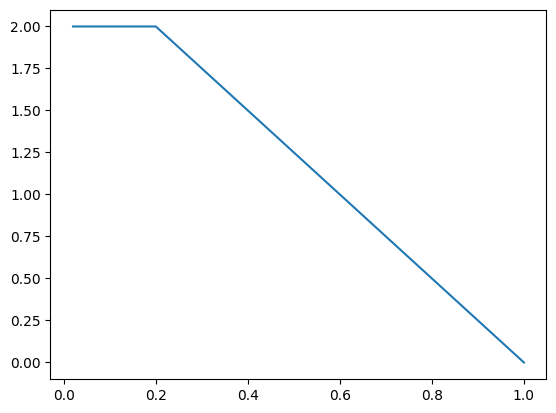

In [7]:
import torch
from my_stuff.guidance_schedules import get_guidance_schedule


ts = torch.linspace(0.0, 1.0, 51)

sched = get_guidance_schedule('linear-ramp-up', scale=2, left=0.0, right=.2)

plt.plot(ts, sched(ts))